In [16]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df_set=pd.read_csv('SET_Data.csv')

df_set.sample(10)

,Date,Close
4890,2016-12-26,1515.23
1298,2002-04-17,390.73
560,1999-04-16,402.54
336,1998-05-20,355.51
1737,2004-01-29,714.04
1689,2003-11-18,636.75
3951,2013-02-18,1523.29
3137,2009-10-19,731.61
925,2000-10-06,267.68
11,1997-01-17,832.55


In [3]:
df_set.describe()

,Close
count,5650.000000
mean,908.426027
std,479.556088
min,207.310000
25%,474.507500
50%,738.160000
75%,1408.732500
max,1838.960000


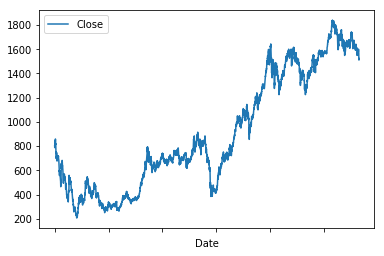

In [4]:
ax = plt.gca()

df_set.plot(kind='line',x='Date',y='Close',ax=ax)

plt.show()

In [5]:
close_price=df_set['Close'].values
percent_change=df_set['Close'].pct_change().dropna()

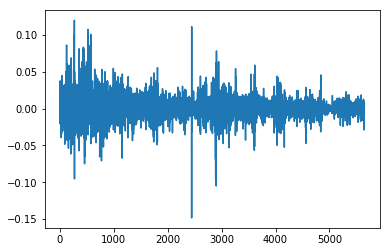

In [6]:
plt.plot(percent_change)

In [7]:
return_array=percent_change.values

In [8]:
data_output=[]
data_input=[]

input_size=5

In [9]:
def setState(ret,input_size):
    state_up=min(0.05,0.002*input_size)
    state_down=max(-0.05,-0.002*input_size)
    
    state=0
        
    if ret>state_up:
        state=1
    elif ret<state_down:
        state=-1
        
    return state

In [10]:
for k in range(len(return_array)-2*input_size+1):
    
    temp_input=[]
    
    for pivot in range(input_size):
        ret=return_array[k+pivot]

        temp_input.append(ret)

    data_input.append(temp_input)
        
    close_t=close_price[k+2*pivot+2]
    close_t_1=close_price[k+pivot+1]
    
    ret=close_t/close_t_1-1

    data_output.append(setState(ret,input_size))

In [11]:
inputs_train,inputs_test, outputs_train,outputs_test = train_test_split(np.array(data_input), np.array(data_output), test_size=0.2)

In [12]:
model = tree.DecisionTreeClassifier()
model.fit(inputs_train,outputs_train)
print("Decision Tree: Training accuracy = "+str(model.score(inputs_train,outputs_train)))
print("Decision Tree: Testing accuracy = "+str(model.score(inputs_test,outputs_test)))

model = RandomForestClassifier(n_estimators=5000)
model.fit(inputs_train,outputs_train)
print("Random Forest: Training accuracy = "+str(model.score(inputs_train,outputs_train)))
print("Random Forest: Testing accuracy = "+str(model.score(inputs_test,outputs_test)))

model = GradientBoostingClassifier(n_estimators=5000)
model.fit(inputs_train,outputs_train)
print("Gradient Boosting: Training accuracy = "+str(model.score(inputs_train,outputs_train)))
print("Gradient Boosting: Testing accuracy = "+str(model.score(inputs_test,outputs_test)))

model = XGBClassifier(n_estimators=5000)
model.fit(inputs_train,outputs_train)
print("XGB: Training accuracy = "+str(model.score(inputs_train,outputs_train)))
print("XGB: Testing accuracy = "+str(model.score(inputs_test,outputs_test)))

Decision Tree: Training accuracy = 1.0
Decision Tree: Testing accuracy = 0.375886524822695
Random Forest: Training accuracy = 1.0
Random Forest: Testing accuracy = 0.37854609929078015
Gradient Boosting: Training accuracy = 1.0
Gradient Boosting: Testing accuracy = 0.3546099290780142
XGB: Training accuracy = 0.9997783687943262
XGB: Testing accuracy = 0.3608156028368794


In [13]:
print("Predict all sideway = "+str(list(outputs_test).count(0)/len(outputs_test)))
print("Predict all uptrend = "+str(list(outputs_test).count(1)/len(outputs_test)))
print("Predict all downtrend = "+str(list(outputs_test).count(-1)/len(outputs_test)))

Predict all sideway = 0.30407801418439717
Predict all uptrend = 0.34929078014184395
Predict all downtrend = 0.3466312056737589
